In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
batch_size = 32
num_classes = 10
epochs = 100

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
Y_train_en = tf.keras.utils.to_categorical(Y_train,10)
Y_test_en = tf.keras.utils.to_categorical(Y_test,10)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])

In [9]:
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [10]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.9887 - accuracy: 0.6512
Test Accuracy of Base Model: 0.651199996471405


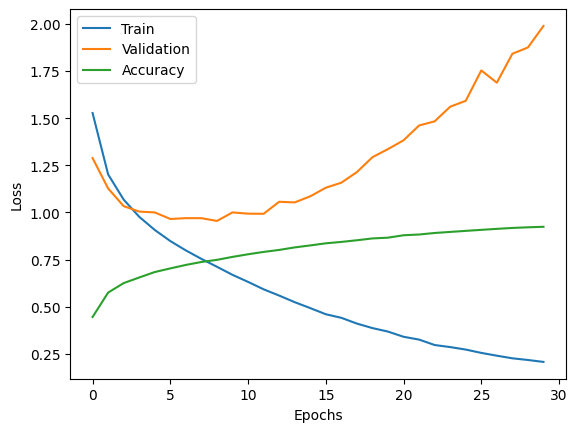

In [12]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10, activation='softmax')])

In [14]:
model_2.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [15]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 30, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 batch_normalization (Batch  (None, 29, 29, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                      

In [16]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.9984 - accuracy: 0.6561
Test Accuracy of Model_2(with more  filters): 0.6560999751091003


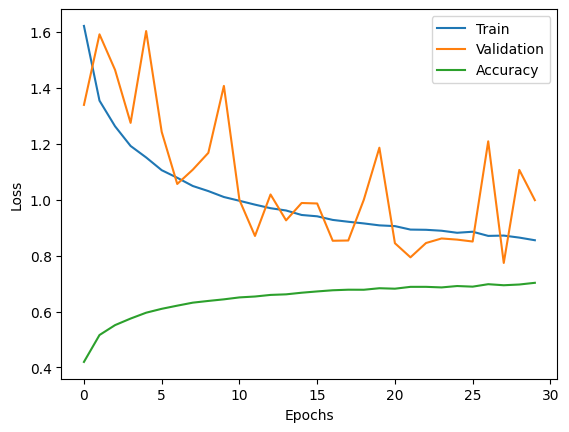

In [17]:
def plotloss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_2)

In [18]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),])

In [19]:
model_3.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [20]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 30, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [21]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.5902 - accuracy: 0.8573
Test Accuracy of Model_2(with more  filters): 0.8572999835014343


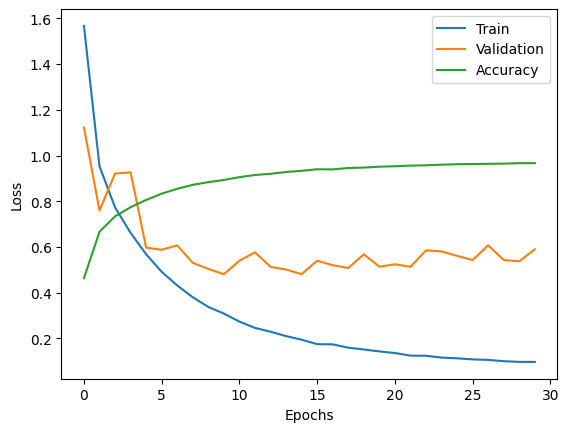

In [22]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_3)

In [23]:
print(len(X_test))

10000
